<a href="https://colab.research.google.com/github/StenSOn27/StenSOn27/blob/main/Order_Total_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict order total price by time of the day
You are given data of orders from restaurant/night club, which contains the time (in hours from 0 to 23) when the order was created, and the total price of
all bought dishes.

In [64]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)

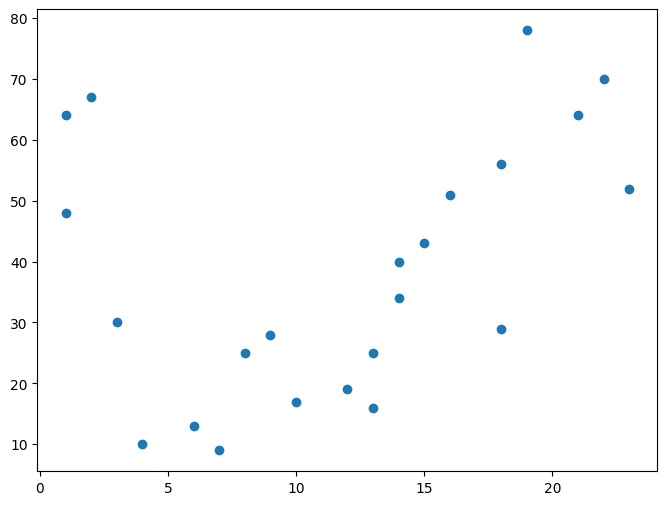

In [65]:
time = [1, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 13, 14, 14, 15, 16, 18, 18, 19, 21, 22, 23]  # in hours
prices = [64, 48, 67, 30, 10, 13, 9, 25, 28, 17, 19, 16, 25, 40, 34, 43, 51, 29, 56, 78, 64, 70, 52]  # in $USD

plt.scatter(time, prices)
plt.show()

# Task

Your task is to create a model using Regression, which will predict future order prices by the hour of the day. The closer this model will be to the truth - the better. All tasks, where you need to modify this Colab are highlights with `TASK`. If no `TASK` provided - then you just need to run that cell without any modifications.

# 1. Linear Regression

Let's start with Linear Regression, and check, if it fits our needs.
Here you need to do these steps (`TASK`):
1. Apply linregress to `time` and `prices`.
2. Create `estimate_order_price` function to predict value by `slope` & `intercept`
3. Map `estimate_order_price` function to `time` and save in `estimated_order_prices` list.
4. Plot the scatter and the linear regression line (already written instead of you)

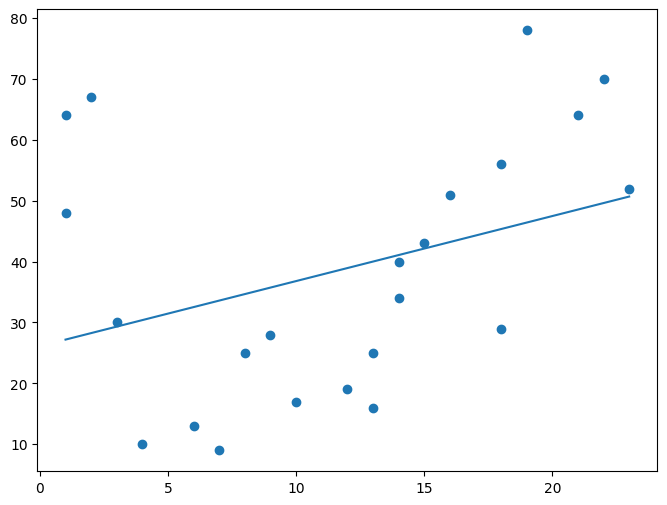

In [66]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(time, prices)

def estimate_order_price(x):
  return slope * x + intercept

estimated_order_prices = list(map(estimate_order_price, time))

plt.scatter(time, prices)
plt.plot(time, estimated_order_prices)
plt.show()

### R2-score & MSE

`TASK`: here you have to calculate R2-score & MSE for `estimated_order_prices`.

In [67]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(prices, estimated_order_prices)
mse = mean_squared_error(prices, estimated_order_prices)

print("R2-score (Determitaion):", r2)
print("MSE:", mse)

R2-score (Determitaion): 0.12072448399264402
MSE: 373.1751667313337


Here we have some values for R2-score & MSE, what do you think, are they good enough? (`TASK`: print Yes or No in cell lower)

In [68]:
print("No")

No


# 2. Train/Test split

Imagine, that we are ok with those values we had for R2-score & MSE.
Let's try to split train/test to understand, how linear regression model will work with predicting different values, which were not used while training.

`TASK`: split 5 first values from dataset to test set, and everything else to train set


In [69]:
test_time = time[18:]
test_prices = prices[18:]

train_time = time[:18]
train_prices = prices[:18]

Let's just plot that split using different colors

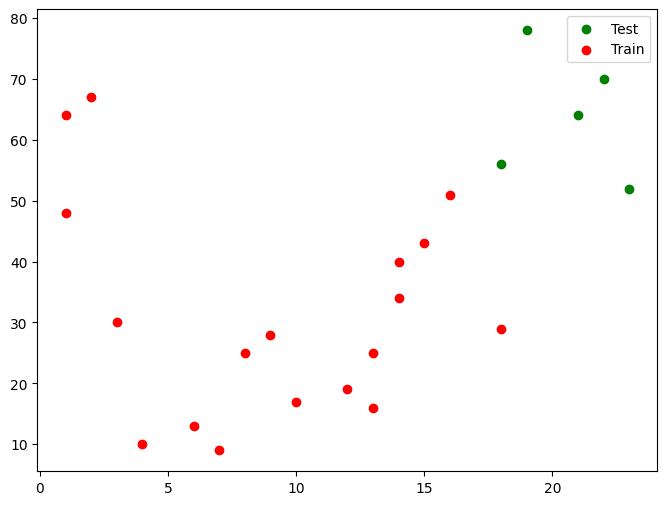

In [70]:
plt.scatter(test_time, test_prices, c="green")
plt.scatter(train_time, train_prices, c="red")
plt.legend(('Test', 'Train'))
plt.show()

### Fit train set

`TASK`: repeat steps 1-3 from 1st task:
1. Apply linregress to `train_time` and `train_prices`.
2. Create `estimate_order_price` function to predict value by `slope` & `intercept`
3. Map `estimate_order_price` function to `time` and save in  `estimated_order_prices` list.

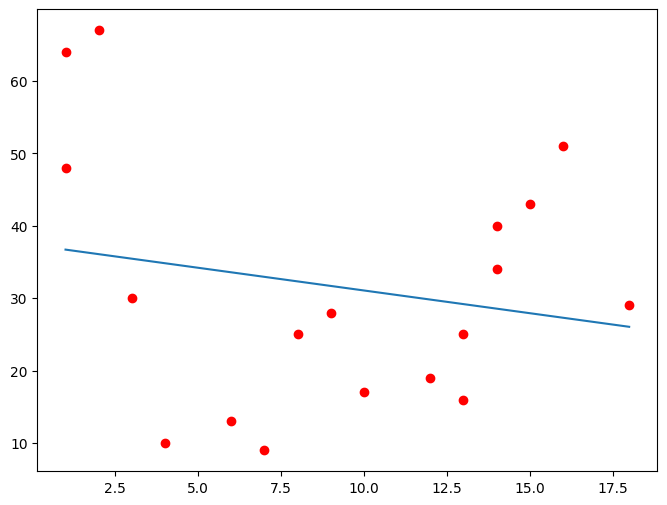

In [71]:

slope, intercept, r, p, std_err = stats.linregress(train_time, train_prices)

estimated_order_prices = list(map(estimate_order_price, train_time))

plt.scatter(train_time, train_prices, c="red")
plt.plot(train_time, estimated_order_prices)
plt.show()

`TASK`: recalculate R2-score & MSE only for train dataset

In [72]:
r2 = r2_score(train_prices, estimated_order_prices)
mse = mean_squared_error(train_prices, estimated_order_prices)

print("R2-score (Determitaion):", r2)
print("MSE:", mse)

R2-score (Determitaion): 0.03847389952616587
MSE: 277.9047844221349


Right now you have different results for R2-score & MSE. Are they quite good? (`TASK`: print Yes or No in cell lower)

In [73]:
print("No")

No


### Evaluate on test set

`TASK`: map `estimate_order_price` for test dataset.
Draw the linear regression line & scatter for test dataset in green color.

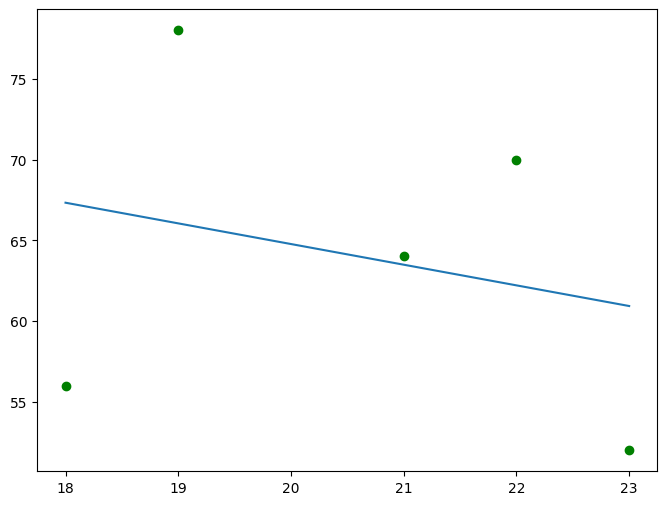

In [82]:
slope, intercept, r, p, std_err = stats.linregress(test_time, test_prices)

estimated_test_prices = list(map(estimate_order_price, test_time))

plt.scatter(test_time, test_prices, c="green")
plt.plot(test_time, estimated_test_prices)


`TASK`: recalculate R2-score & MSE only for test dataset

In [78]:
r2 = r2_score(test_prices, estimated_test_prices)
mse = mean_squared_error(test_prices, estimated_test_prices)

print("R2-score (Determitaion):", r2)
print("MSE:", mse)

R2-score (Determitaion): -17.753344249510242
MSE: 1650.2942939569014


Compare the results of this R2-score & MSE for test set with the values you have for train set. Are they close? (`TASK`: print Yes or No in cell lower)

In [79]:
print("No")

No


# Train/Test split randomly

You may already noticed, that we have split train/test sets not really well previously. Let's do it in best-practice way using function [model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in sklearn.

`TASK`:
Use `train_test_split` with `test_size` = 0.2 and `random_state` = 25 (just to have the same split for everyone) and split `time` and `prices` into `x_train`, `x_test`, `y_train` and `y_test`.

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    time, prices, test_size=0.2, random_state=25
)

Let's just plot new split

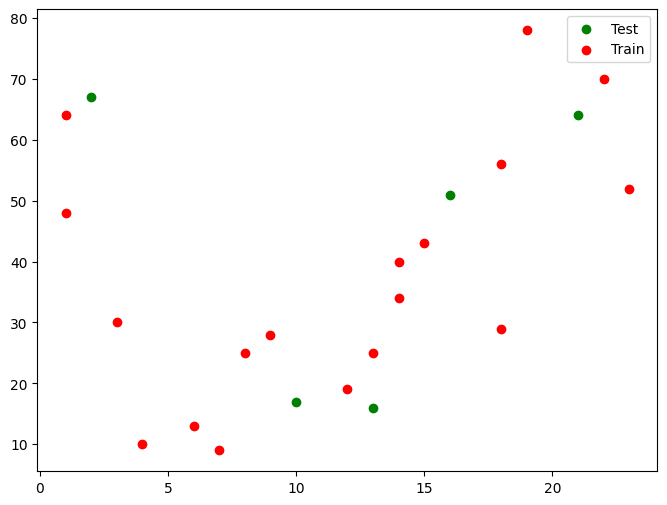

In [81]:
plt.scatter(x_test, y_test, c="green")
plt.scatter(x_train, y_train, c="red")
plt.legend(('Test', 'Train'))
plt.show()

### Fit Train one more time, but with different train/test split

`TASK`: repeat already known steps 1-3 but for new train set. Draw the line, and draw scatter in red color.

In [ ]:

plt.show()

`TASK`: You already know what to do (for new train) 😀

In [ ]:
print("R2-score (Determitaion):", "<Write Your Code Here>")
print("MSE:", "<Write Your Code Here>")

Results are not good, but still. Proceeding with it.

### Evaluate one more time on test, but with different train/test split

`TASK`: map `estimate_order_price` for new test dataset. Draw the linear regression line & scatter for new test dataset in green color.

In [ ]:
estimated_order_prices = []  # map here

# plots here
plt.show()

`TASK`: You already know what to do (for new test) 😀

In [ ]:
print("R2-score (Determitaion):", "<Write Your Code Here>")
print("MSE:", "<Write Your Code Here>")

At least, these R2-score & MSE right now are not so different for train and test. So we know, that train/split process right now is quite fine, but accuracy of our predictions is still really bad 😞

# Polynomial Regression

By this moment, we can say, that linear regression probably won't fit our needs.
Let's try different approach called [Polynomial Regression](https://www.w3schools.com/python/python_ml_polynomial_regression.asp) (`TASK`: read this article precisely).

Maybe it may help us to achieve better results, because the result model won't be just a straight line, this line will be curved one (part of polynomial equation).

### Fit train

`TASK`: using `numpy` create `model` using `poly1d`, `polyfit` (degree of polynom = 3) and create `line` using `linspace`. Use only train set here.

In [ ]:
import numpy

# create model & line

plt.scatter(x_train, y_train, c="red")
plt.plot(line, model(line))
plt.show()

### Predict future value

You can try predicting values using this model

In [ ]:
model(10)

### R2-score & MSE

Let's check R2-score & MSE for train set for Polynomial Regression

In [ ]:
print("R2-score (Determitaion):", "<Write Your Code Here>")
print("MSE:", "<Write Your Code Here>")

Is the result better? Could we proceed with it? (`TASK`: print Yes or No in cell lower)

In [ ]:
print("Yes|No")

### Evaluate on test

`TASK`: draw the curved line of polynomial regression and scatter for test set using green color.

In [ ]:
# scatter & curved line plots
plt.show()

Last but not least.
`TASK`: Calculate R2-score & MSE for test set for Polynomial Regression model.

In [ ]:
print("R2-score (Determitaion):", "<Write Your Code Here>")
print("MSE:", "<Write Your Code Here>")

Is it quite ok, and is it similar to what we have with train set? (`TASK`: print Yes or No in cell lower)

In [ ]:
print("Yes|No")

# Results

Finally, we have quite good model to predict future values built with Polynomial Regression.